Import needed libraries.

In [17]:
import geopandas as gpd
from matplotlib import pyplot as plt
import us

Configure `matplotlib`.

In [18]:
%matplotlib inline

Load county shapefile and check out the first couple rows.

**Note:** This is the same county shapefile as before, just re-projected so we can map it alongside the other data we'll be using.

In [19]:
counties = gpd.read_file(
    "../source_data/counties_simple/counties_simple_4326.shp"
)

counties.head(2)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,680956809,61588406,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."


Get the FIPS Code for a state of our choosing.

In [20]:
state_obj = us.states.lookup('OK')

state_obj.fips

print(state_obj.fips)

40


Plot only this state's counties.

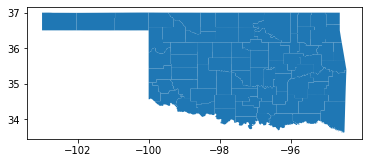

In [21]:
sole_state = counties[ counties['STATEFP'] == state_obj.fips]

sole_state.plot()

## Mapping points over a polygon layer

Load in our point data (U.S. power plants) and explore the first few rows.

In [22]:
power_plants = gpd.read_file(
    "../source_data/power_plants/power_plants.shp"
)

power_plants.head(3)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,StateName,Zip,Street_Add,...,Geo_MW,Bat_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,Alabama,35476,19001 Lock 17 Road,...,None,None,None,Hydroelectric = 53 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201910,33.458665,-87.356823,POINT (-87.35682 33.45867)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,Alabama,36512,North Highway 43,...,None,None,None,"Coal = 1118.5 MW, Natural Gas = 1219.4 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201910,31.006900,-88.010300,POINT (-88.01030 31.00690)
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,Alabama,36092,750 Bouldin Dam Road,...,None,None,None,Hydroelectric = 224.1 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201910,32.583889,-86.283056,POINT (-86.28306 32.58389)


Now map the power plant data. _(Note how the values are points, rather than areas.)_

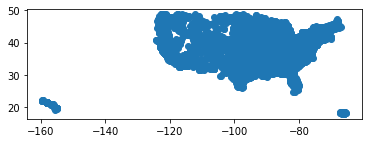

In [23]:
power_plants.plot()

Let's focus on power plants in the "lower 48" states.

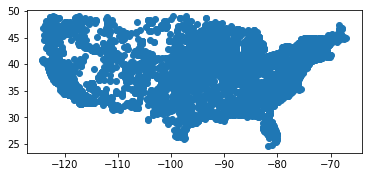

In [24]:
continental_power_plants = power_plants[
    ~power_plants['StateName'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])
]

continental_power_plants.plot()

The `PrimSource` column gives us several values to choose from:

In [25]:
continental_power_plants['PrimSource'].unique()

array(['hydroelectric', 'natural gas', 'nuclear', 'coal',
       'pumped storage', 'petroleum', 'geothermal', 'wind', 'biomass',
       'other', 'batteries', 'solar'], dtype=object)

Let's see where primarily wind-powered facilities are located.

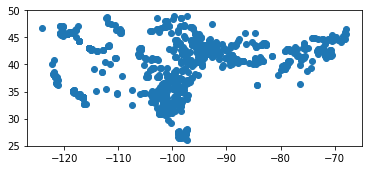

In [26]:
continental_wind_plants = continental_power_plants[
    continental_power_plants['PrimSource'] == 'wind'
]

continental_wind_plants.plot()

We can compare that footprint to primarily coal-powered facilities.

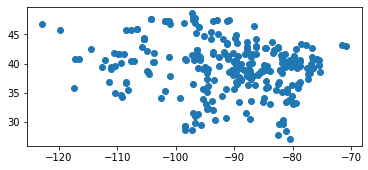

In [27]:
continental_coal_plants = continental_power_plants[
    continental_power_plants['PrimSource'] == 'coal'
]

continental_coal_plants.plot()

Now that we've seen each group separately, let's map them together.

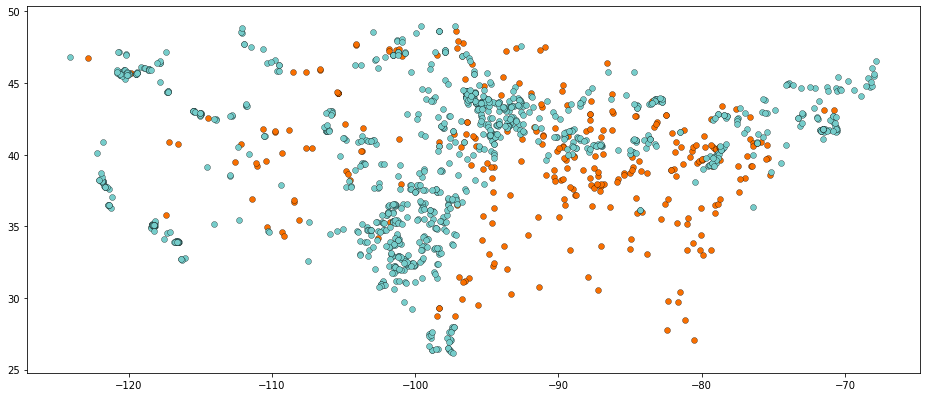

In [28]:
fig, ax = plt.subplots( figsize = (16, 9) )

continental_coal_plants.plot(
    ax = ax,
    color = "#F86F00",
    edgecolor = "black",
    linewidth = 0.3,
    markersize = 35
)

continental_wind_plants.plot(
    ax = ax,
    color = '#75CCCA',
    edgecolor = "black",
    linewidth = 0.3,
    markersize = 35
)

We can add a layer of counties behind these points — and punch up the styles as we've done in previous sections.

(-127.74715050000003,
 -63.98726750000001,
 23.146905499999992,
 50.63376049999998)

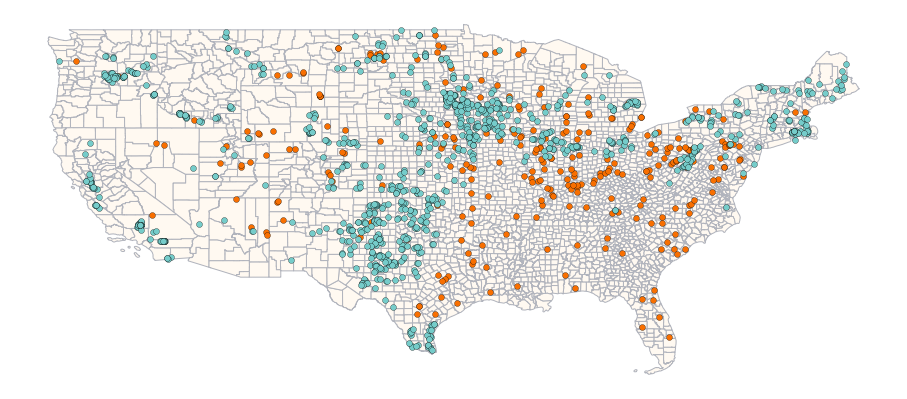

In [29]:
fig, ax = plt.subplots( figsize = (16, 9) )

ax = counties.plot(
    ax = ax,
    linewidth = 1,
    edgecolor = "#B1B4BD",
    color = "#FFF9F1"
)

continental_coal_plants.plot(
    ax = ax,
    color = "#F86F00",
    edgecolor = "black",
    linewidth = 0.3,
    markersize = 35
)

continental_wind_plants.plot(
    ax = ax,
    color = '#75CCCA',
    edgecolor = "black",
    linewidth = 0.3,
    markersize = 35
)

ax.axis("off")

We can also limit the plot to the state we chose earlier.

(-103.43098315, -94.00243985, 33.44550112418677, 37.191790392077515)

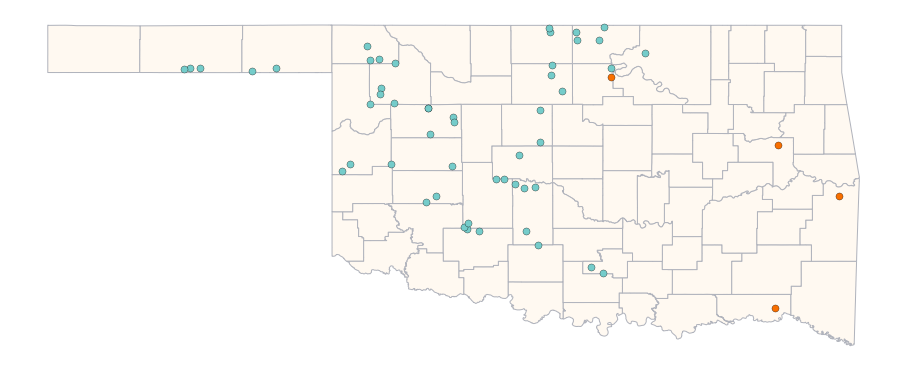

In [30]:
fig, ax = plt.subplots( figsize = (16, 9) )

ax = sole_state.plot(
    ax = ax,
    linewidth = 1,
    edgecolor = "#B1B4BD",
    color = "#FFF9F1"
)

state_coal_plants = continental_coal_plants[
    continental_coal_plants['StateName'] == state_obj.name
]

state_coal_plants.plot(
    ax = ax,
    color = "#F86F00",
    edgecolor = "black",
    linewidth = 0.3,
    markersize = 50
)

state_wind_plants = continental_wind_plants[
    continental_wind_plants['StateName'] == state_obj.name
]

state_wind_plants.plot(
    ax = ax,
    color = '#75CCCA',
    edgecolor = "black",
    linewidth = 0.3,
    markersize = 50
)

ax.axis("off")

It's easy to add and place a legend, and give the state map a title.

Text(0.5, 1, 'Coal & wind power mix in Oklahoma')

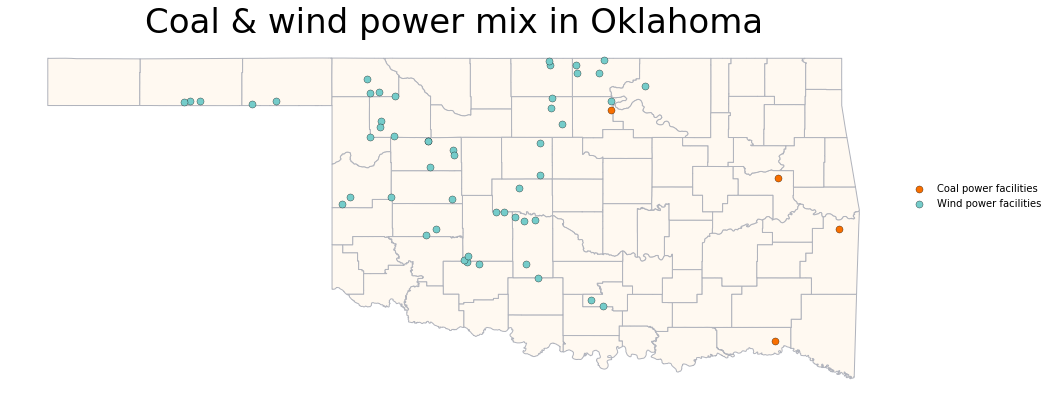

In [31]:
fig, ax = plt.subplots( figsize = (16, 9) )

ax = sole_state.plot(
    ax = ax,
    linewidth = 1,
    edgecolor = "#B1B4BD",
    color = "#FFF9F1"
)

state_coal_plants = continental_coal_plants[
    continental_coal_plants['StateName'] == state_obj.name
]

state_coal_plants.plot(
    ax = ax,
    label='Coal power facilities',
    color = "#F86F00",
    edgecolor = "black",
    linewidth = 0.3,
    markersize = 50
)

state_wind_plants = continental_wind_plants[
    continental_wind_plants['StateName'] == state_obj.name
]

state_wind_plants.plot(
    ax = ax,
    label='Wind power facilities',
    color = '#75CCCA',
    edgecolor = "black",
    linewidth = 0.3,
    markersize = 50
)

ax.axis("off")

ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5), frameon=False)

ax.set_title(f"Coal & wind power mix in {state_obj.name}", fontsize = 34)

Finally, save this map as an image.

In [32]:
fig.savefig(
    f"../output-images/03__power-mix-{state_obj.abbr.lower()}.png", 
    transparent = False,
    bbox_inches = "tight"
)
